In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Load the data
df = pd.read_csv('Data_For_Model.csv')
X = df.iloc[:, 1::].values
y = df.iloc[:, 0].values
# Split the data into train and validation. The training set will be
# used later in k-cross validation, so it remains as X, and y
X, X_validation, y, y_validation = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

n_splits = 5
skfolds = StratifiedKFold(n_splits=n_splits)

classifiers = [
    SGDClassifier(random_state=42),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]


In [17]:
cols = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1Score']
df_metrics = pd.DataFrame(columns=cols)
acc_dict = {}
prec_dict = {}
recall_dict = {}
f1_dict = {}

# Fit each model with k splits. Thus, we split the data
# into (n_splits) buckets, and use (n_splits - 1) buckets to 
# train, and 1 bucket to validate the model. Previously we already
# split the data into training and 
for clf in classifiers:
    for train_index, test_index in skfolds.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accu = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        if name in acc_dict:
            acc_dict[name].append(accu)
            prec_dict[name].append(prec)
            recall_dict[name].append(recall)
            f1_dict[name].append(f1)
        else:
            acc_dict[name] = [accu]
            prec_dict[name] = [prec]
            recall_dict[name] = [recall]
            f1_dict[name] = [f1]

[[17503   206     0]
 [  155 10383   147]
 [    0   133  9560]]


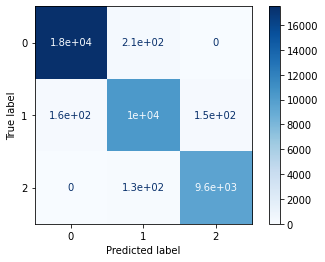

In [25]:
disp = plot_confusion_matrix(clf, X_validation, y_validation,
                                 cmap=plt.cm.Blues)
print(disp.confusion_matrix)

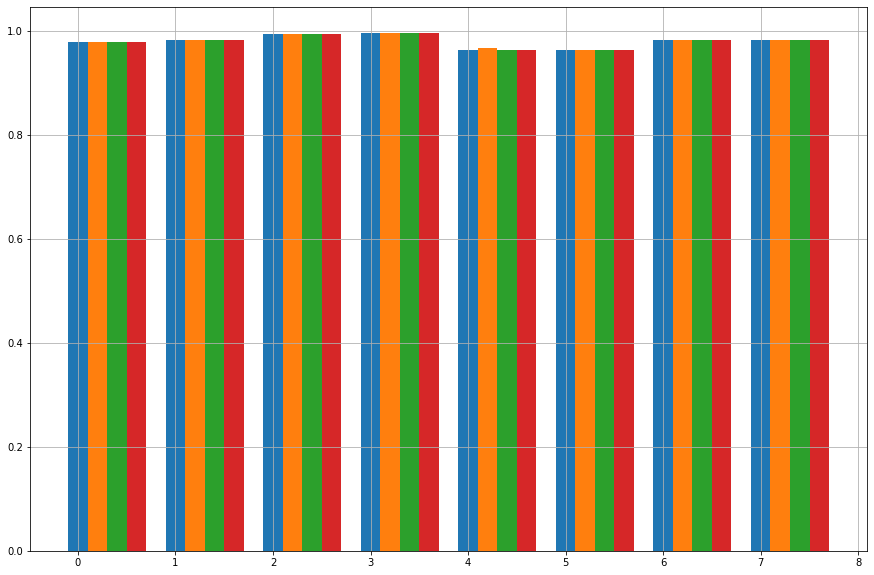

In [14]:
for classifier in acc_dict:
    acc_dict[classifier] = np.mean(acc_dict[classifier])
    prec_dict[classifier] = np.mean(prec_dict[classifier])
    recall_dict[classifier] = np.mean(recall_dict[classifier])
    f1_dict[classifier] = np.mean(f1_dict[classifier])
    new_entry = pd.DataFrame([[classifier, acc_dict[classifier], prec_dict[classifier],
                               recall_dict[classifier], f1_dict[classifier]]],
                             columns=cols)
    df_metrics = df_metrics.append(new_entry, ignore_index=True)

barWidth = 0.2
r1 = np.arange(len(df_metrics.Classifier))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(r1, df_metrics.Accuracy, width=0.2)
plt.bar(r2, df_metrics.Precision, width=0.2)
plt.bar(r3, df_metrics.Recall, width=0.2)
plt.bar(r4, df_metrics.F1Score, width=0.2)
plt.grid()